In [52]:
import numpy as np
import random

In [53]:
cards = ['Ace'] + [i for i in range(2, 11)] + ['Jack', 'Queen', 'King']
card_values = [i for i in range(1, 11)] + [10]*3
card_values[0] = 11
cards_dict = dict(zip(cards, card_values))

In [89]:
num_simulations = 500000

In [90]:
def draw_random_card():
    card = random.choice(list(cards_dict.keys()))
    return cards_dict[card]

def check_card(val_sum, card_val, usable_ace):
    val_sum += card_val
    if (val_sum > 21):
        if (usable_ace):
            val_sum -= 10
            usable_ace = False
    if (card_val == 11):
        usable_ace = True
    return val_sum, usable_ace

In [91]:
def simulation():
    state_triplets = []
    usable_ace = False
    usable_ace_dealer = False
    player_val_sum = 0
    dealer_val_sum = 0
    player_val_sum, usable_ace = check_card(player_val_sum, draw_random_card(), usable_ace)
    dealer_show_card = draw_random_card()
    state_triplets.append((usable_ace, dealer_show_card, player_val_sum))
    dealer_val_sum += dealer_show_card
    player_val_sum, usable_ace = check_card(player_val_sum, draw_random_card(), usable_ace)
    state_triplets.append((usable_ace, dealer_show_card, player_val_sum))
    dealer_val_sum += draw_random_card()
    
    while True:
        if (player_val_sum >= 20):
            break
        player_val_sum, usable_ace = check_card(player_val_sum, draw_random_card(), usable_ace)
        state_triplets.append((usable_ace, dealer_show_card, player_val_sum))
    
    if (player_val_sum > 21):
        return -1, state_triplets
    elif(player_val_sum == 21 and dealer_val_sum == 21):
        return 0, state_triplets
    elif (player_val_sum == 21):
        return 1, state_triplets
    
    while True:
        if (dealer_val_sum >= 17):
            break
        dealer_val_sum += dealer_show_card
        
    player_diff = 21 - player_val_sum
    dealer_diff = 21 - dealer_val_sum
    
    if (player_diff > dealer_diff):
        return -1, state_triplets
    elif (player_diff == dealer_diff):
        return 0, state_triplets
    else:
        return 1, state_triplets
        

In [104]:
def main(num_simulations):
    state_values = []
    usable_ace_rewards = np.zeros((10, 10)) #[[0 for i in range(10)] for j in range(10)]
    non_usable_ace_rewards = np.ones((10, 10)) #[[0 for i in range(10)] for j in range(10)]
    usable_ace_counts = [[1 for i in range(10)] for j in range(10)]
    non_usable_ace_counts = [[1 for i in range(10)] for j in range(10)]
    for sim in range(num_simulations):
        reward, state_triples = simulation()
        for triple in state_triples:
            dealer_card = (triple[1] - 1)%10
            player_val = triple[2] - 12
            if (triple[0] and player_val >= 0 and player_val < 10):
                usable_ace_rewards[dealer_card][player_val] += reward
                usable_ace_counts[dealer_card][player_val] += 1
            elif (not triple[0] and player_val >= 0 and player_val < 10):
                non_usable_ace_rewards[dealer_card][player_val] += reward
                non_usable_ace_counts[dealer_card][player_val] += 1

    for i in range(len(usable_ace_rewards)):
        for j in range(len(usable_ace_rewards[0])):
            usable_ace_rewards[i][j] /= usable_ace_counts[i][j]
            non_usable_ace_rewards[i][j] /= non_usable_ace_counts[i][j]
    return usable_ace_rewards, non_usable_ace_rewards

In [109]:
#Plotting code taken from https://stackoverflow.com/questions/11766536/matplotlib-3d-surface-from-a-rectangular-array-of-heights
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
def plot_3d(v):
    X = np.arange(0, 10)
    Y = np.arange(0, 10)
    X, Y = np.meshgrid(X, Y)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, v, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)
    ax.view_init(azim=-130)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()


In [121]:
usable_ace_rewards_10ksim, non_usable_ace_rewards_10ksim = main(10000) 

In [122]:
usable_ace_rewards_500ksim, non_usable_ace_rewards_500ksim = main(500000) 

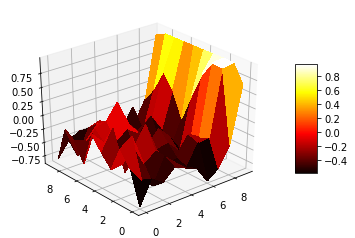

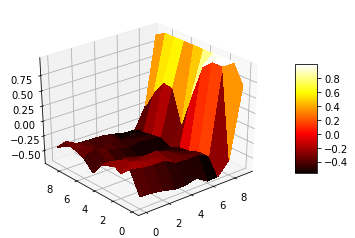

In [123]:
plot_3d(usable_ace_rewards_10ksim)
plot_3d(usable_ace_rewards_500ksim)

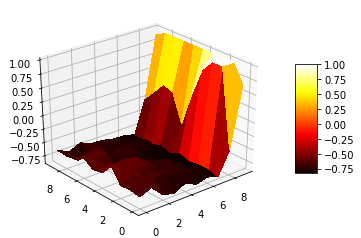

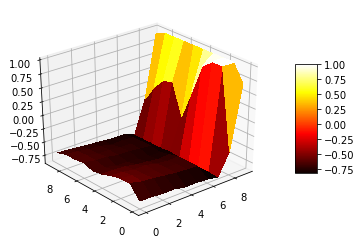

In [117]:
plot_3d(non_usable_ace_rewards_10ksim)
plot_3d(non_usable_ace_rewards_500ksim)